# Task10 CDNOW用户数据分析

In [3]:
#导入相关包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.导入数据

In [13]:
import os

In [15]:
os.chdir('C:\\Users\\Van\\Desktop\\data file')

In [18]:
data = pd.read_table('CDNOW.txt', sep = '\s+',
                     names = ['user_id','order_dt','order_products','order_amount'])

## 2.数据预处理

In [19]:
data.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


通过查看数据，可知无缺失值

In [22]:
#变量格式调整
data.order_dt=pd.to_datetime(data.order_dt,format='%Y%m%d')

In [23]:
data.head()

,user_id,order_dt,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


## 3.商品销售静态分析

In [24]:
data.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


商品购买数量：均值是2.41，最大值是99，最小值是1

商品购买金额：均值是35.89，最大值是1286.01，最小值是0


## 4.商品销售动态分析

In [60]:
data2=data.copy()
data2['order_dt']=pd.to_datetime(data2['order_dt'],format='%Y%m%d')
data2['month']=data2['order_dt'].values.astype('datetime64[M]')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0B7BD6DA0>,
      dtype=object)

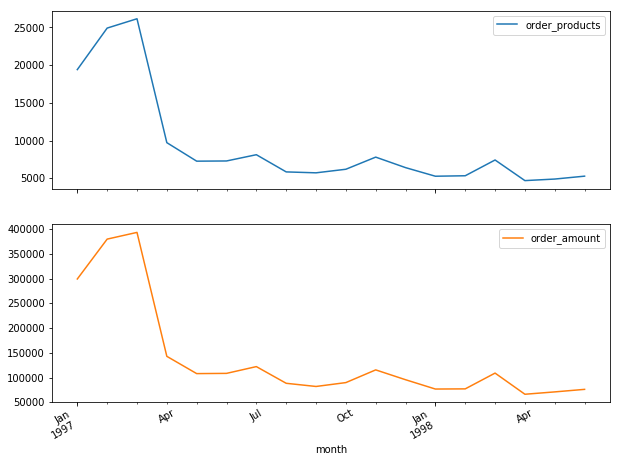

In [34]:
data2.groupby('month')[['order_products','order_amount']].sum().plot(kind='line',subplots=True,
                                                                     figsize=(10,8))

由上图可以看出，金额和销量在1-3呈上升趋势，后随下降趋势，可能与春节效应有关

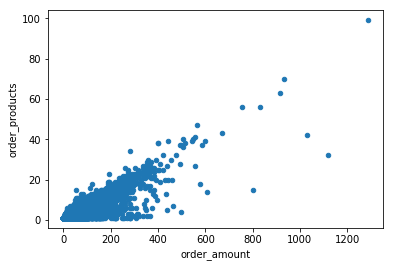

In [37]:
#散点图

data2.plot.scatter(x='order_amount',y='order_products')

## 5.用户消费行为静态分析

In [41]:
data.groupby('user_id').sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


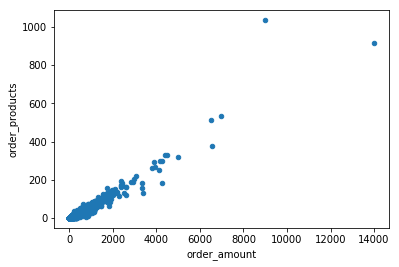

In [42]:
data.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_products')

In [45]:
#用户购买次数
data.groupby('user_id')['order_products'].count().describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: order_products, dtype: float64

## 6.用户消费行为静态分析

In [62]:
# 用户首次购买时间
data2.groupby('user_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [63]:
# 用户最后消费时间
data2.groupby('user_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [65]:
#用户生命周期

user_period=data2[['user_id','order_products','order_amount','order_dt']]

order_date_min=user_period.groupby('user_id').order_dt.min()
order_date_max=user_period.groupby('user_id').order_dt.max()

(order_date_max-order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_dt, dtype: timedelta64[ns]

In [66]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_dt, dtype: object

In [67]:
(order_date_max-order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

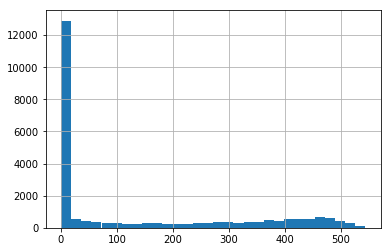

In [68]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)

In [70]:
# 复购率

pivoted_count=data2.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)

pivoted_count.head()

C:\Users\Van\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'month' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
columns_month=data2.month.sort_values().astype('str').unique()

pivoted_counts_transf=pivoted_count.applymap(lambda x : 1 if x>1 else np.NaN if x==0 else 0)


pivoted_counts_transf.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


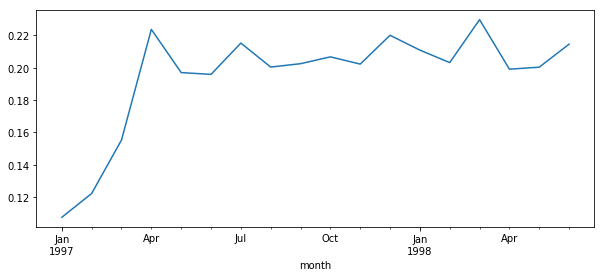

In [73]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))

In [75]:
# 回购率

pivoted_amount=data2.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)

C:\Users\Van\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'month' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


In [77]:
columns_month=data2.month.sort_values().astype('str').unique()
pivoted_amount.columns=columns_month

In [78]:
pivoted_purchase=pivoted_amount.applymap(lambda x : 1 if x>0 else 0)

In [79]:
def purchase_return(data):
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[1+i]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NAN)
    status.append(np.NAN)
    return pd.Series(status,index=columns_month)

In [80]:
pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)

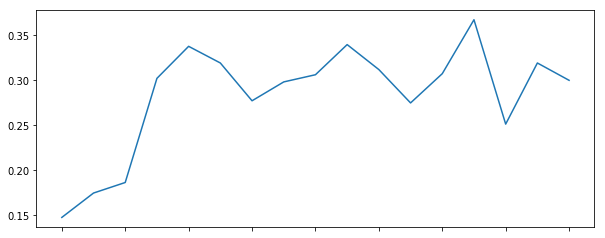

In [81]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))

Text(0.5,1,'pivoted_purchase_return')

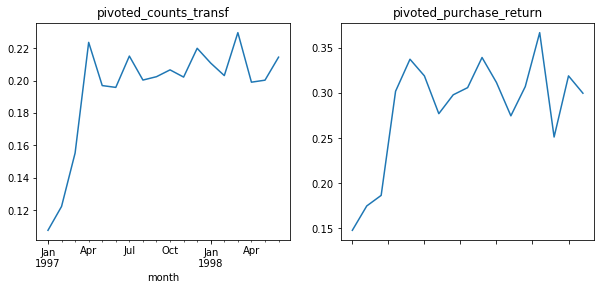

In [82]:
plt.figure()

plt.subplot(121)
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))
plt.title('pivoted_counts_transf')
plt.subplot(122)
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))
plt.title('pivoted_purchase_return')